In [9]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/credit-scoring-dataset/.xlsx
/kaggle/input/credit-scoring-dataset/bki_balance.csv
/kaggle/input/credit-scoring-dataset/cash_pos_balance.csv
/kaggle/input/credit-scoring-dataset/credit_card_balance.csv
/kaggle/input/credit-scoring-dataset/installments_payments.csv
/kaggle/input/credit-scoring-dataset/Dependencies.jpeg
/kaggle/input/credit-scoring-dataset/train.csv
/kaggle/input/credit-scoring-dataset/previous_loan.csv
/kaggle/input/credit-scoring-dataset/bki.csv


In [10]:
import warnings                                                                                         #import libraries
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from time import process_time
from scipy import stats

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer, KNNImputer

#from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import accuracy_score, make_scorer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectFromModel, SelectKBest, f_classif, VarianceThreshold
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split

import lightgbm as lgb
from xgboost import XGBClassifier, XGBRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingClassifier as GBoost, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
#from sklearn.pipeline import make_pipeline

%matplotlib inline

In [11]:
df = pd.read_csv('/kaggle/input/credit-scoring-dataset/train.csv')

In [12]:
df.shape

(261384, 122)

In [13]:
df = df.sample(frac=0.1)
df.reset_index(inplace=True)
df.drop(['index'], axis=1, inplace=True)

In [14]:
df.shape

(26138, 122)

In [15]:
df.head()

,reco_id_curr,target,contract_type_name,gender,own_car_flag,own_realty_flag,children_count,income,loan_body,annuity_payment,...,document_18_flag,document_19_flag,document_20_flag,document_21_flag,requests_bki_hour,requests_bki_day,requests_bki_week,requests_bki_month,requests_bki_qrt,requests_bki_year
0,333602,0,Cash loans,M,N,Y,1,180000.0,442791.0,52677.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,448072,0,Cash loans,F,Y,Y,0,180000.0,2410380.0,89455.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,279183,0,Cash loans,F,N,N,0,135000.0,423000.0,16074.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
3,203526,0,Cash loans,M,N,Y,0,315000.0,1741972.5,46080.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
4,400369,0,Cash loans,F,N,N,1,76500.0,1195587.0,35086.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [16]:
df.describe()

,reco_id_curr,target,children_count,income,loan_body,annuity_payment,goods_price,population_relative_region,days_birth,days_employed,...,document_18_flag,document_19_flag,document_20_flag,document_21_flag,requests_bki_hour,requests_bki_day,requests_bki_week,requests_bki_month,requests_bki_qrt,requests_bki_year
count,26138.000000,26138.000000,26138.000000,2.613800e+04,2.613800e+04,26137.000000,2.611000e+04,26138.000000,26138.000000,26138.000000,...,26138.000000,26138.000000,26138.000000,26138.000000,22669.000000,22669.000000,22669.000000,22669.000000,22669.000000,22669.000000
mean,278134.387941,0.081529,0.426888,1.679972e+05,5.954095e+05,27056.204117,5.362836e+05,0.020950,-15989.123231,63000.204032,...,0.007728,0.000650,0.000574,0.000306,0.005382,0.008779,0.035026,0.268958,0.267193,1.886806
std,102510.041212,0.273651,0.741244,9.758765e+04,4.030976e+05,14563.332388,3.708824e+05,0.013821,4370.089236,140581.237884,...,0.087572,0.025495,0.023949,0.017492,0.074361,0.140779,0.210266,0.920407,0.617256,1.857832
min,100026.000000,0.000000,0.000000,2.610000e+04,4.500000e+04,2164.500000,4.500000e+04,0.000533,-25196.000000,-17139.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190204.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16456.500000,2.340000e+05,0.010006,-19611.000000,-2743.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277480.000000,0.000000,0.000000,1.462500e+05,5.094000e+05,24903.000000,4.500000e+05,0.018850,-15645.000000,-1235.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,366341.750000,0.000000,1.000000,2.025000e+05,8.086500e+05,34650.000000,6.795000e+05,0.028663,-12376.000000,-304.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456231.000000,1.000000,19.000000,3.150000e+06,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7678.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,6.000000,6.000000,17.000000,8.000000,22.000000


# **Errors correction**

In [17]:
df.days_employed.describe()

count     26138.000000
mean      63000.204032
std      140581.237884
min      -17139.000000
25%       -2743.000000
50%       -1235.000000
75%        -304.000000
max      365243.000000
Name: days_employed, dtype: float64

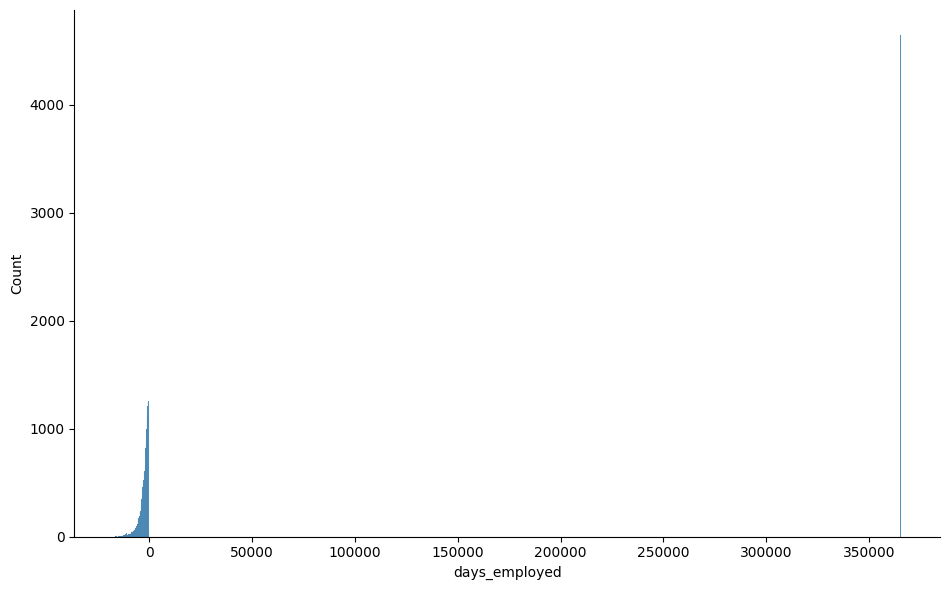

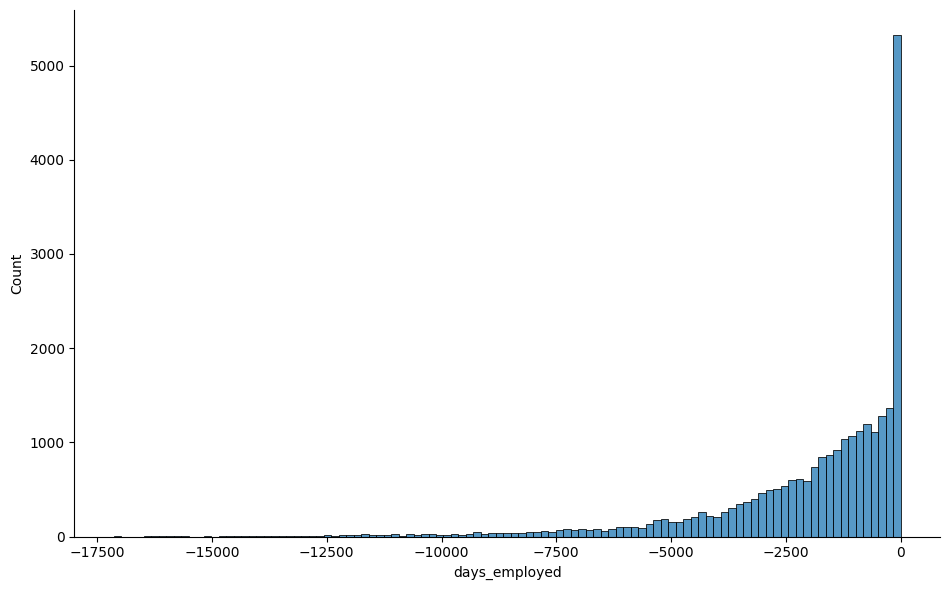

In [18]:
sns.displot(data=df, x='days_employed', kind='hist', height=6, aspect=1.6)

df['days_employed'] = df['days_employed'].apply(lambda x: 0 if x > 0 else x)

sns.displot(data=df, x='days_employed', kind='hist', height=6, aspect=1.6)

# **Deleting rows or columns with gaps**

In [19]:
df_notna = df.notna().sum()
df_notna

reco_id_curr          26138
target                26138
contract_type_name    26138
gender                26138
own_car_flag          26138
                      ...  
requests_bki_day      22669
requests_bki_week     22669
requests_bki_month    22669
requests_bki_qrt      22669
requests_bki_year     22669
Length: 122, dtype: int64

In [20]:
na_col = np.unique(df_notna, return_counts=True)
na_col

(array([ 7893,  8042,  8314,  8324,  8487,  8855,  8994, 10722, 10963,
        11435, 11812, 12313, 12956, 12963, 13087, 13092, 13119, 13223,
        13448, 13603, 13839, 18003, 21013, 22669, 26016, 26046, 26083,
        26110, 26137, 26138]),
 array([ 3,  3,  1,  3,  3,  3,  1,  3,  3,  1,  3,  3,  3,  1,  3,  3,  1,
         3,  3,  1,  1,  1,  1,  6,  1,  4,  1,  1,  1, 57]))

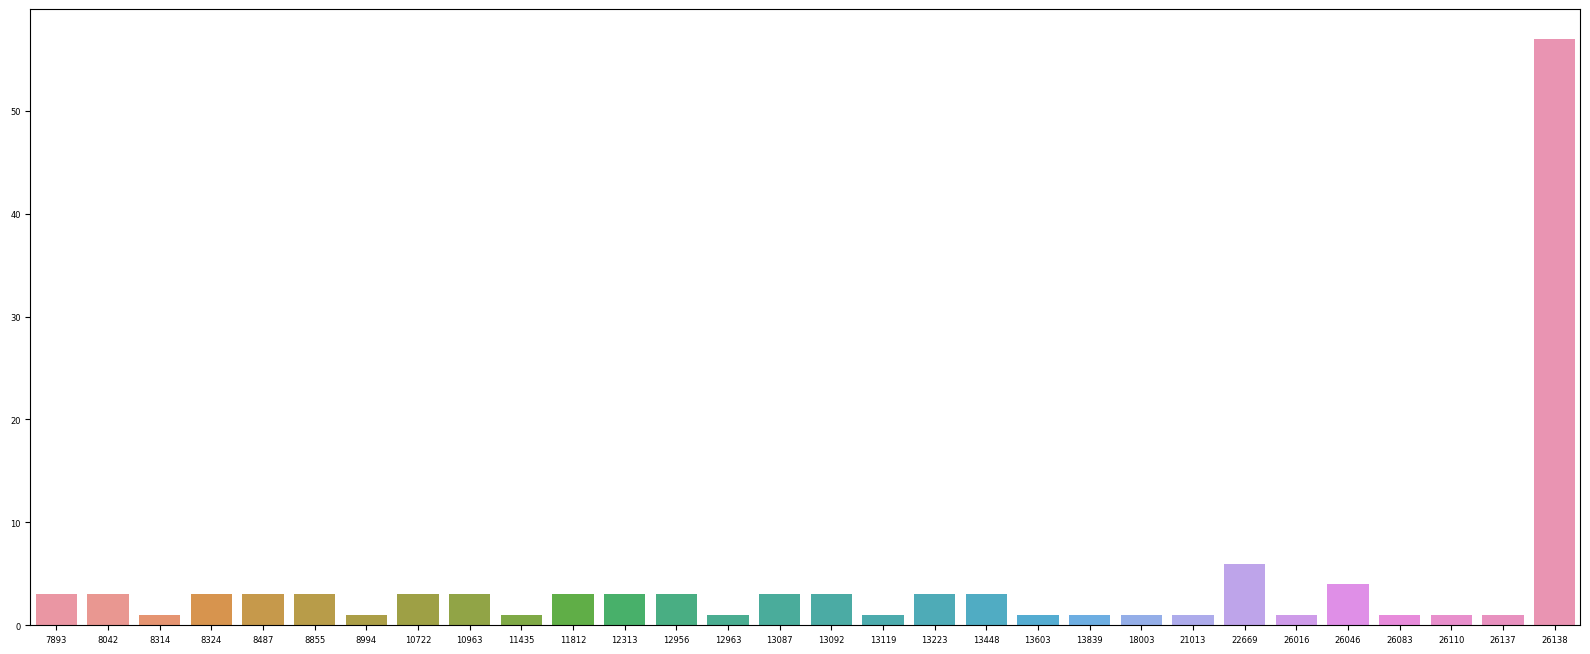

In [21]:
plt.figure(figsize=(20,8))
b = sns.barplot(x=na_col[0], y=na_col[1])
b.tick_params(labelsize=6)

In [22]:
for i in df.iloc[:,2:].columns:                                                  #deleting columns with 20% gaps and more
    if df[i].notna().sum() < 0.8*len(df):
        del(df[i]) 

In [23]:
df.shape

(26138, 72)

# **Digitisation of categorical values**

In [24]:
df_g = pd.get_dummies(df, drop_first=True)
df_g.head()

,reco_id_curr,target,children_count,income,loan_body,annuity_payment,goods_price,population_relative_region,days_birth,days_employed,...,type_of_organization_Trade: type 4,type_of_organization_Trade: type 5,type_of_organization_Trade: type 6,type_of_organization_Trade: type 7,type_of_organization_Transport: type 1,type_of_organization_Transport: type 2,type_of_organization_Transport: type 3,type_of_organization_Transport: type 4,type_of_organization_University,type_of_organization_XNA
0,333602,0,1,180000.0,442791.0,52677.0,400500.0,0.001276,-12388,-1826,...,False,False,False,True,False,False,False,False,False,False
1,448072,0,0,180000.0,2410380.0,89455.5,2250000.0,0.008866,-22053,0,...,False,False,False,False,False,False,False,False,False,True
2,279183,0,0,135000.0,423000.0,16074.0,423000.0,0.026392,-16363,-801,...,False,False,False,False,False,False,False,False,False,False
3,203526,0,0,315000.0,1741972.5,46080.0,1557000.0,0.030755,-19488,-11450,...,False,False,False,False,False,False,False,False,True,False
4,400369,0,1,76500.0,1195587.0,35086.5,1044000.0,0.010032,-13003,-4879,...,False,False,False,False,False,False,False,False,False,False


# **Study of hidden categorical data**

In [25]:
list_uniq = []
list_len_uniq = []

for i in df_g.columns:
    a = df_g[i].unique()
    
    list_uniq.append(a)
    list_len_uniq.append(len(a))

In [26]:
hist_unique = np.unique(list_len_uniq, return_counts=True)
hist_unique

(array([    1,     2,     3,     4,     7,     8,    10,    11,    12,
           18,    19,    24,    26,    80,   439,   521,   701,  2682,
         3172,  5509,  6439,  6860, 10766, 12988, 22619, 26138]),
 array([  3, 123,   2,   1,   1,   3,   1,   1,   1,   1,   1,   1,   2,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1]))

<Axes: >

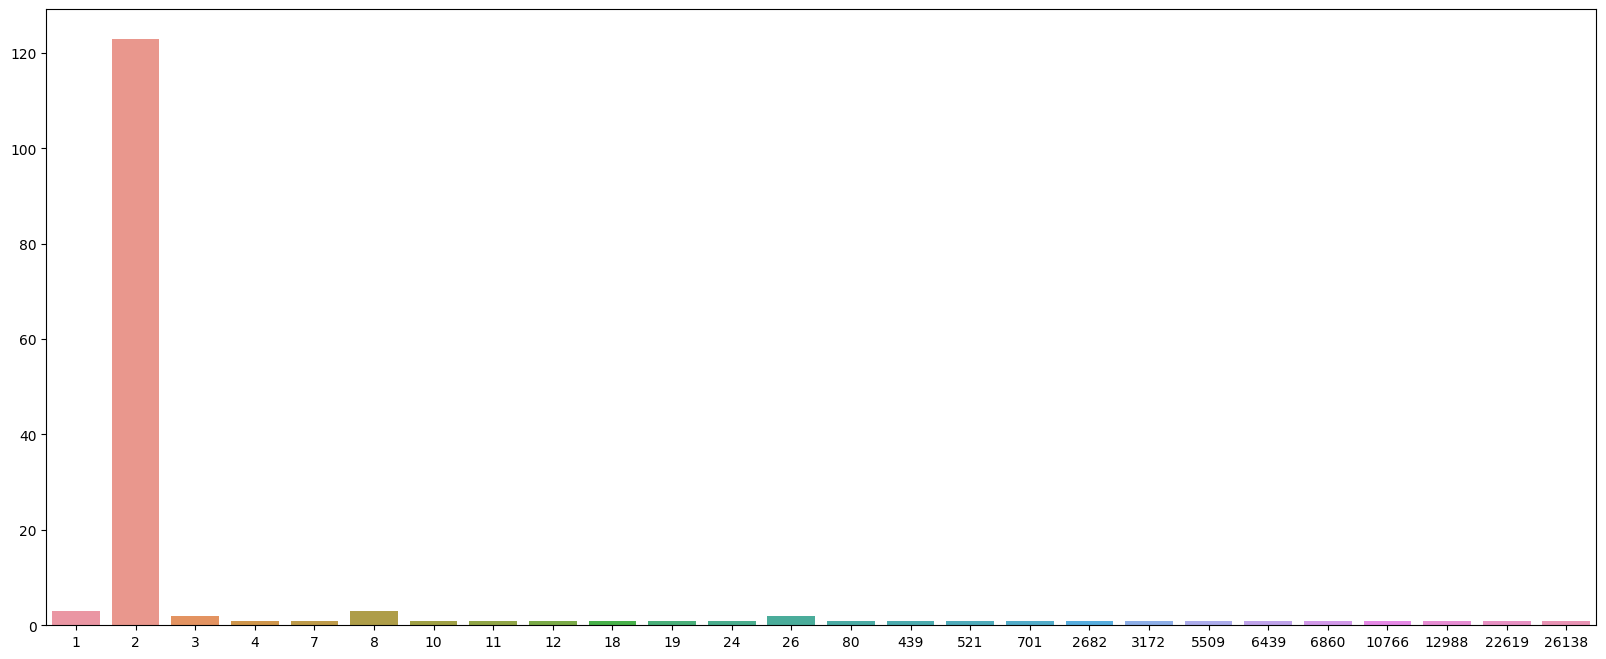

In [27]:
plt.figure(figsize=(20,8))
sns.barplot(x=hist_unique[0], y=hist_unique[1])

In [28]:
nom_col = list(set(df_g.columns) - set(df.columns))
hide_nom_col = []
to_drop = []

for i in range(len(df_g.columns)):                                                           #displaying the column names
    if (list_len_uniq[i] <= 27) & (list_len_uniq[i] > 2) & (df_g.columns[i]!='target'):
        col = df_g.columns[i]
        print(col)
                                                                         #don't apply Imputer to columns with these names
        if i == 'children_count' and i == 'rating_client_region' and i == 'rating_client_w_city_region':  
            continue
            
        hide_nom_col.append(col)
        
        #df_g[df_g.columns[i]] = df_g[df_g.columns[i]].fillna()
        imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent') #fill in with the most encountered data
        imp_mean.fit(df_g[col].values.reshape(len(df_g[col]), 1))
        df_g[col] = imp_mean.transform(df_g[col].values.reshape(-1, 1))
        
        print(df_g[col].unique())
        print('\n')
        
    elif list_len_uniq[i] == 1:                                                #remove columns filled with only one value
        col = df_g.columns[i]
        to_drop.append(col)

children_count
[ 1  0  2  3  4  5  7  6 14 19 10]


family_members__count
[ 3.  2.  1.  4.  5.  6.  7.  9.  8. 15. 20. 12.]


rating_client_region
[2 3 1]


rating_client_w_city_region
[2 3 1]


hour_of_approval_process_start
[ 6 15 13  5  9  8 10 14 12 11 21 16 17  7  4 18  3 19 20  2  1 22  0 23]


observes_30_count_social_circle
[ 0.  4.  3.  2.  1.  6.  5.  7.  9.  8. 10. 14. 12. 11. 15. 13. 21. 16.
 19. 18. 23. 22. 17. 20. 24.]


social_circle_defaults_30_days
[0. 2. 1. 4. 3. 5. 6.]


observes_60_count_social_circle
[ 0.  4.  3.  2.  1.  6.  5.  7.  9.  8. 10. 14. 12. 15. 13. 11. 21. 16.
 18. 23. 22. 20. 19. 24. 17.]


social_circle_defaults_60_days
[0. 2. 1. 4. 3. 5.]


requests_bki_hour
[0. 1. 2.]


requests_bki_day
[0. 1. 2. 3. 4. 6. 5.]


requests_bki_week
[0. 1. 2. 3. 4. 5. 6.]


requests_bki_month
[ 0.  1.  2.  4.  3. 11.  6.  9.  5.  7. 17.  8. 13. 10. 16. 12. 14. 15.]


requests_bki_qrt
[0. 1. 5. 2. 3. 4. 8. 7. 6.]


requests_bki_year
[ 0.  2.  4.  5.  3.  7.  1.  6.  8.  

In [29]:
for col in hide_nom_col:
    df_g[col] = df_g[col].astype('str')

In [30]:
for i in to_drop:
    del df_g[i]

In [31]:
df_g = pd.get_dummies(df_g, drop_first=True)
df_g

,reco_id_curr,target,income,loan_body,annuity_payment,goods_price,population_relative_region,days_birth,days_employed,registration_timestamp,...,requests_bki_year_18.0,requests_bki_year_2.0,requests_bki_year_22.0,requests_bki_year_3.0,requests_bki_year_4.0,requests_bki_year_5.0,requests_bki_year_6.0,requests_bki_year_7.0,requests_bki_year_8.0,requests_bki_year_9.0
0,333602,0,180000.0,442791.0,52677.0,400500.0,0.001276,-12388,-1826,-812.0,...,False,False,False,False,False,False,False,False,False,False
1,448072,0,180000.0,2410380.0,89455.5,2250000.0,0.008866,-22053,0,-1499.0,...,False,False,False,False,False,False,False,False,False,False
2,279183,0,135000.0,423000.0,16074.0,423000.0,0.026392,-16363,-801,-1018.0,...,False,True,False,False,False,False,False,False,False,False
3,203526,0,315000.0,1741972.5,46080.0,1557000.0,0.030755,-19488,-11450,-13459.0,...,False,False,False,False,True,False,False,False,False,False
4,400369,0,76500.0,1195587.0,35086.5,1044000.0,0.010032,-13003,-4879,-2829.0,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26133,211073,0,180000.0,156384.0,18558.0,135000.0,0.002506,-13543,-300,-4782.0,...,False,False,False,True,False,False,False,False,False,False
26134,112757,0,103500.0,315000.0,15750.0,315000.0,0.004960,-11660,-1320,-5647.0,...,False,False,False,False,False,False,False,False,False,False
26135,225997,0,103500.0,533668.5,22738.5,477000.0,0.006305,-10677,-2317,-1589.0,...,False,False,False,False,False,False,True,False,False,False
26136,299517,0,180000.0,577912.5,30919.5,535500.0,0.007020,-20955,0,-4891.0,...,False,False,False,False,False,False,False,False,False,False


# **Filling in the gaps**

In [32]:
imp = IterativeImputer(max_iter=10, random_state=0)                                                        #the first way
imp.fit(df_g.iloc[:,2:].values)
df_g_it = imp.transform(df_g.iloc[:,2:].values)

In [33]:
df_g_it

array([[ 180000. ,  442791. ,   52677. , ...,       0. ,       0. ,
              0. ],
       [ 180000. , 2410380. ,   89455.5, ...,       0. ,       0. ,
              0. ],
       [ 135000. ,  423000. ,   16074. , ...,       0. ,       0. ,
              0. ],
       ...,
       [ 103500. ,  533668.5,   22738.5, ...,       0. ,       0. ,
              0. ],
       [ 180000. ,  577912.5,   30919.5, ...,       0. ,       0. ,
              0. ],
       [ 360000. ,  640080. ,   29970. , ...,       0. ,       0. ,
              0. ]])

In [34]:
knn = KNNImputer(n_neighbors=8)                                                                           #the second way
knn.fit(df_g.iloc[:,2:].values)
df_g_knn = knn.transform(df_g.iloc[:,2:].values)

In [35]:
df_g_knn

array([[ 180000. ,  442791. ,   52677. , ...,       0. ,       0. ,
              0. ],
       [ 180000. , 2410380. ,   89455.5, ...,       0. ,       0. ,
              0. ],
       [ 135000. ,  423000. ,   16074. , ...,       0. ,       0. ,
              0. ],
       ...,
       [ 103500. ,  533668.5,   22738.5, ...,       0. ,       0. ,
              0. ],
       [ 180000. ,  577912.5,   30919.5, ...,       0. ,       0. ,
              0. ],
       [ 360000. ,  640080. ,   29970. , ...,       0. ,       0. ,
              0. ]])

In [36]:
df2 = df_g_it  #df_g_knn

In [37]:
df3 = pd.DataFrame(data=df2, columns=df_g.iloc[:,2:].columns)
df3['reco_id_curr'] = df_g['reco_id_curr']
df3['target'] = df_g['target']

df3.head()

,income,loan_body,annuity_payment,goods_price,population_relative_region,days_birth,days_employed,registration_timestamp,publication_timestamp,employee_phone_flag,...,requests_bki_year_22.0,requests_bki_year_3.0,requests_bki_year_4.0,requests_bki_year_5.0,requests_bki_year_6.0,requests_bki_year_7.0,requests_bki_year_8.0,requests_bki_year_9.0,reco_id_curr,target
0,180000.0,442791.0,52677.0,400500.0,0.001276,-12388.0,-1826.0,-812.0,-4522.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,333602,0
1,180000.0,2410380.0,89455.5,2250000.0,0.008866,-22053.0,0.0,-1499.0,-4629.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,448072,0
2,135000.0,423000.0,16074.0,423000.0,0.026392,-16363.0,-801.0,-1018.0,-4081.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,279183,0
3,315000.0,1741972.5,46080.0,1557000.0,0.030755,-19488.0,-11450.0,-13459.0,-2966.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,203526,0
4,76500.0,1195587.0,35086.5,1044000.0,0.010032,-13003.0,-4879.0,-2829.0,-4243.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,400369,0


# **Search for emissions**

In [38]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

In [39]:
df_for_clust = preprocessing.normalize(df3.iloc[:, :-2].values)
df_for_clust

array([[0.28756159, 0.70738713, 0.0841549 , ..., 0.        , 0.        ,
        0.        ],
       [0.05448709, 0.72963656, 0.02707872, ..., 0.        , 0.        ,
        0.        ],
       [0.2199772 , 0.68926189, 0.02619195, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.14302246, 0.73745491, 0.03142141, ..., 0.        , 0.        ,
        0.        ],
       [0.22248041, 0.71430117, 0.03821657, ..., 0.        , 0.        ,
        0.        ],
       [0.41766743, 0.74261269, 0.03477081, ..., 0.        , 0.        ,
        0.        ]])

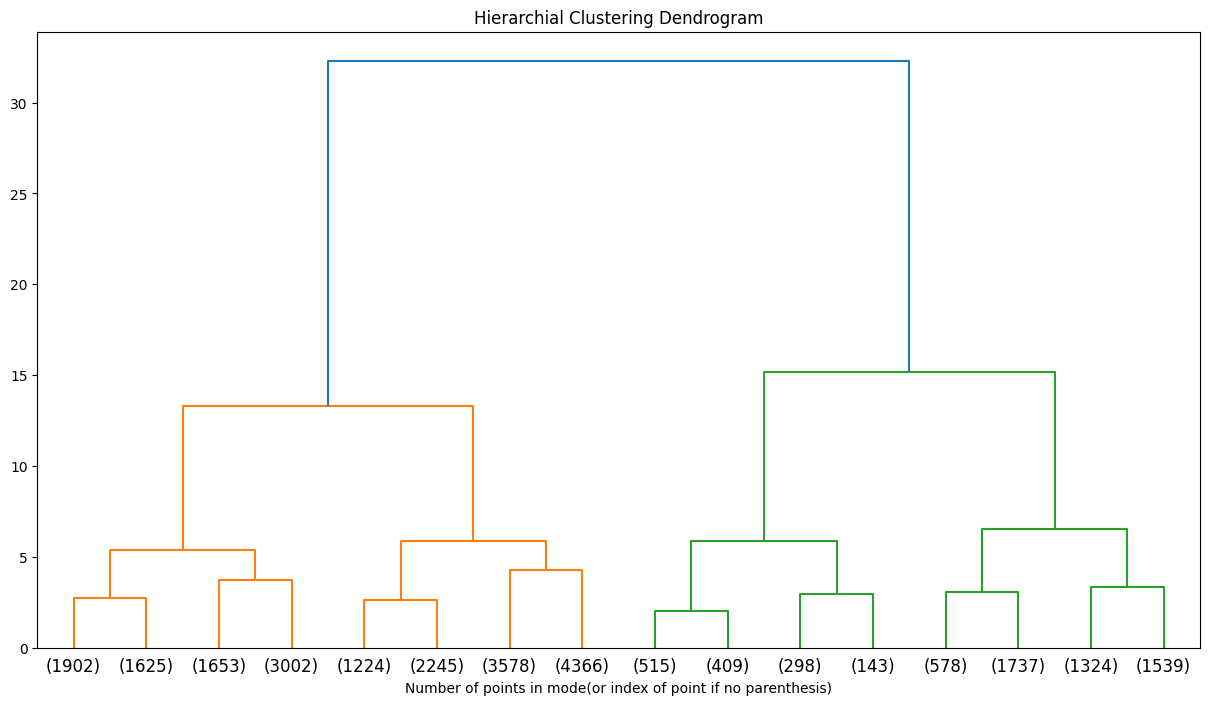

In [40]:
def plot_dendrogram(model, **kwargs):                                                                      #the first way
    #Create linkage matrix and then plot the dendrogram
    
    #Create the number of samples at each angle
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1     #sheet knot
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
        
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    #Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

#setting distance threshold_0 ensures we compute the full tree
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(df_for_clust)
plt.figure(figsize=(15,8))
plt.title('Hierarchial Clustering Dendrogram')
#plot the top-3 levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel('Number of points in mode(or index of point if no parenthesis)')
plt.show()

In [41]:
from sklearn.cluster import DBSCAN                                                                        #the second way

outlier_detection = DBSCAN(eps=7)
clusters = outlier_detection.fit_predict(df_for_clust)
list(clusters).count(-1)

0

# **Future selection**

<Axes: >

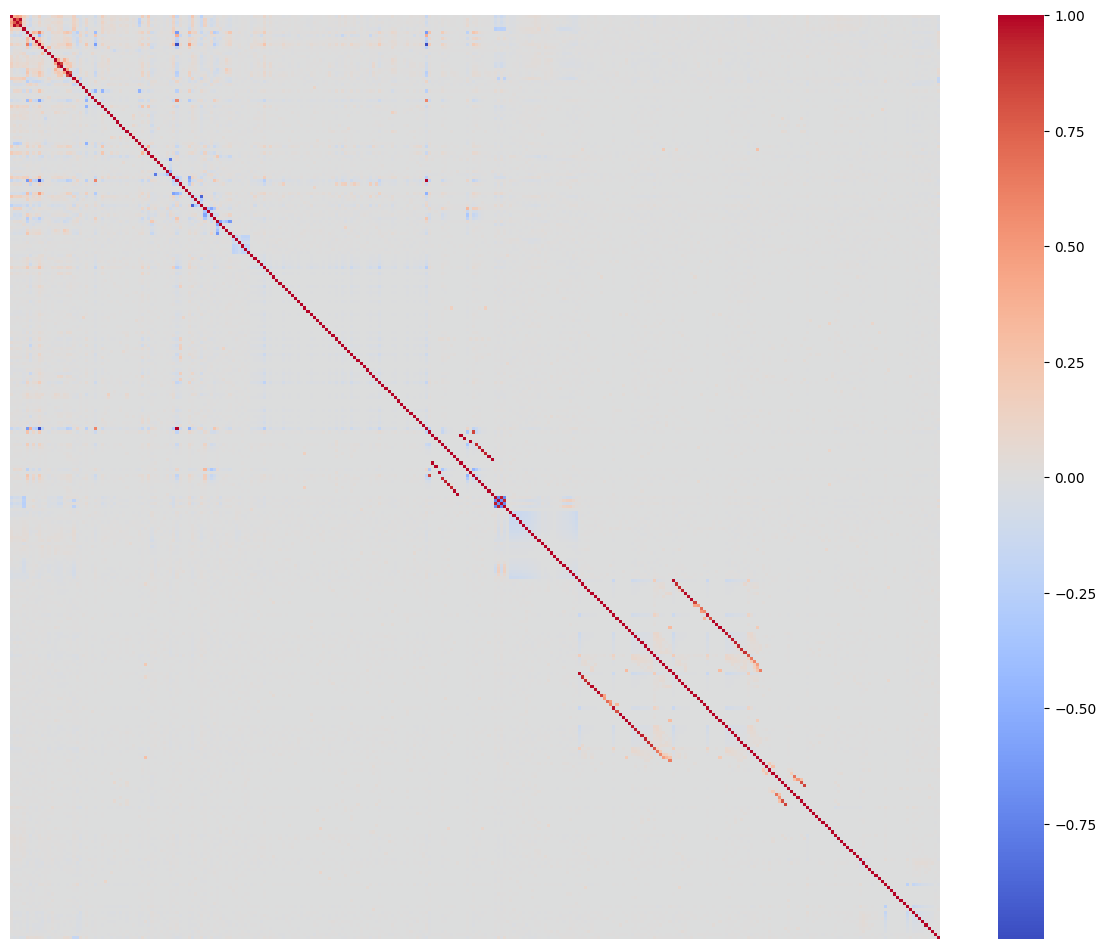

In [42]:
cor = df3.corr()                                                                                          #by corellation

plt.figure(figsize=(15,12))
sns.heatmap(cor, xticklabels=False, yticklabels=False, cmap='coolwarm')

In [43]:
df3.shape

(26138, 298)

In [44]:
all_features = list(cor.columns)
f_to_del = []

for i in cor.columns:
    if i == 'target':
        continue
    for j in cor.index:
        if all_features.index(j) >= all_features.index(i) or j == 'target':
            continue
        else:
            if abs(cor.loc[i,j]) > 0.8:
                if abs(cor.loc['target', i]) > abs(cor.loc['target', j]):
                    f_to_del.append(j)
                else:
                    f_to_del.append(i)

In [45]:
f_to_del = set(f_to_del)
print(len(f_to_del))
f_to_del

41


{'children_count_5',
 'education_type_name_Secondary / secondary special',
 'employee_phone_flag',
 'family_members__count_12.0',
 'family_members__count_15.0',
 'family_members__count_20.0',
 'family_members__count_3.0',
 'family_members__count_4.0',
 'family_members__count_5.0',
 'family_members__count_6.0',
 'family_members__count_8.0',
 'family_members__count_9.0',
 'income_type_name_Pensioner',
 'living_city_not_work_city_flag',
 'living_region_not_work_region_flag',
 'loan_body',
 'observes_30_count_social_circle_1.0',
 'observes_30_count_social_circle_10.0',
 'observes_30_count_social_circle_14.0',
 'observes_30_count_social_circle_16.0',
 'observes_30_count_social_circle_2.0',
 'observes_30_count_social_circle_3.0',
 'observes_30_count_social_circle_6.0',
 'observes_30_count_social_circle_7.0',
 'observes_30_count_social_circle_8.0',
 'observes_60_count_social_circle_11.0',
 'observes_60_count_social_circle_12.0',
 'observes_60_count_social_circle_13.0',
 'observes_60_count_soc

In [46]:
for i in f_to_del:
    del df3[i]

In [47]:
df3.shape

(26138, 257)

In [48]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler                                                  #by model
from sklearn.linear_model import LogisticRegression

In [49]:
not_nan = (df.target == 0) | (df.target == 1)

scaler = MinMaxScaler()                                                                                     #maybe scaler
scaler.fit(df3)
df3_norm = pd.DataFrame(data=scaler.transform(df3), columns=df3.columns)

X_all = df3_norm.iloc[:,:-2].values
X = df3_norm[not_nan].iloc[:,:-2].values
y = df3_norm[not_nan].iloc[:, -1].values

In [50]:
y

array([0., 0., 0., ..., 0., 0., 1.])

In [51]:
from sklearn.feature_selection import SelectFromModel

log_r = LogisticRegression(penalty='l2').fit(X,y)
model = SelectFromModel(log_r, prefit=True, max_features=100)
X_new = model.transform(X_all)
X_new

array([[0.19742165, 0.08876404, 0.89345936, ..., 0.        , 0.        ,
        0.        ],
       [0.34116571, 0.5505618 , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.0543635 , 0.09438202, 0.95326448, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.08041085, 0.10786517, 0.86481125, ..., 0.        , 0.        ,
        0.        ],
       [0.11238524, 0.12247191, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.10867424, 0.1011236 , 0.82980337, ..., 0.        , 0.        ,
        0.        ]])

In [52]:
X_new.shape

(26138, 82)

# **Splitting into training and test samples**

In [54]:
not_nan = (df.target == 0) | (df.target == 1)

X = X_new[:-1000]
y = df[not_nan].target.values
y2 = y[:-1000]
X_to_pred = X_new[-1000:]
y_to_pred = y[-1000:]
y=y2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("Value of train sample - {}, \nValue of test sample - {}\n".format(len(X_train), len(X_test)))
print("Count of objects '1' in train sample - {}, \n                     in test sample - {}\n".format(y_train.sum(), y_test.sum()))

Value of train sample - 20110, 
Value of test sample - 5028

Count of objects '1' in train sample - 1660, 
                     in test sample - 381



In [55]:
train = pd.DataFrame(data=X_train)
train['target'] = y_train

train.head()

,0,1,2,3,4,5,6,7,8,9,...,73,74,75,76,77,78,79,80,81,target
0,0.026716,0.033708,0.920766,0.576873,0.0,0.0,0.741161,0.681715,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.153734,0.269663,1.000000,0.328502,0.0,0.0,0.013393,0.644839,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.044303,0.056180,0.922224,0.318567,0.0,0.0,0.563314,0.238352,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.196542,0.213483,0.906237,0.672150,0.0,0.0,0.738486,0.769364,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.167118,0.224719,0.881207,0.756515,0.0,0.0,0.822336,0.742982,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [56]:
train_1 = train[train.target == 1]
train_0 = train[train.target == 0]
train_2 = df[~not_nan].values

print("Before rebalancing:\nCount of '0' class objects in train sample - {}\nCount of '1' class objects - {}\n".format(len(train_0), len(train_1)))

train_0 = train_0.sample(train_1.shape[0]*2, random_state=0)

train_1 = pd.concat([train_1, train_1.copy()])
train_bal = pd.concat([train_1, train_0])

print("After rebalancing:\nCount of '0' class objects in train sample - {}\nCount of '1' class objects - {}".format(len(train_0), len(train_1)))

X_train = train_bal.iloc[:,:-1].values
y_train = train_bal.loc[:,['target']].values

Before rebalancing:
Count of '0' class objects in train sample - 18450
Count of '1' class objects - 1660

After rebalancing:
Count of '0' class objects in train sample - 3320
Count of '1' class objects - 3320


In [57]:
print('Train sample after rebalancing:')
print(np.unique(y_train, return_counts=True)[1])
print('')
print('Test sample:')
print(np.unique(y_test, return_counts=True)[1])

Train sample after rebalancing:
[3320 3320]

Test sample:
[4647  381]


In [58]:
test_mean = np.mean(X_test, axis=0)
pred_mean = np.mean(X_new[-1000:], axis=0)

print(len(test_mean), len(pred_mean))

82 82


In [59]:
from scipy.stats import ttest_ind
ttest_ind(test_mean, pred_mean)

TtestResult(statistic=-0.03390694097418195, pvalue=0.9729930994778292, df=162.0)

# **Model selection and validation**

In [60]:
def results(y_test, y_pred, time=0):
    report = metrics.classification_report(y_test, y_pred, target_names=['recovered', 'uncovered'])
    print(report)
    
    print('\nSquare under ROC-curve - ' + str(round(metrics.roc_auc_score(y_test, y_pred), 4)))
    if time != 0:
        print('\nCode working time - ' + str(round(time, 4)) + ' sec')

        
def ROC_curve(y_test, model):
    sns.set(font_scale=1.5)
    sns.set_color_codes("muted")
    
    plt.figure(figsize=(6,5))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1], pos_label=1)
    lw=2
    plt.plot(fpr, tpr, lw=lw, label='ROC curve')
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.savefig('ROC.png')
    plt.show()
    

def ROC_curve_all(y_test, y_pred):
    sns.set(font_scale=1.5)
    sns.set_color_codes("muted")
    
    plt.figure(figsize=(6,5))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
    lw=2
    plt.plot(fpr, tpr, lw=lw, label='ROC curve')
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.savefig('ROC.png')
    plt.show()

In [61]:
from sklearn.metrics import make_scorer
from sklearn import metrics

roc_auc_scorer = make_scorer(metrics.roc_auc_score, greater_is_better=True, needs_threshold=True)

# **Models**

In [62]:
import lightgbm as lgb
from xgboost import XGBClassifier, XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier as GBoost, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [63]:
clf = LogisticRegression( random_state=0, C=1, penalty='l2', solver='liblinear' )
clf.fit( X_train, y_train )

rf = RandomForestClassifier( n_estimators=250, max_depth=None, random_state=11, criterion='entropy' )
rf.fit( X_train, y_train )

XGB = XGBClassifier( refresh_leaf=0, verbosity=0, max_depth=3, n_estimators=150, reg_alpha=0, reg_lambda=10 )
xgb_model = XGB.fit( X_train, y_train, verbose=0, eval_metric='auc', eval_set=[(X_test, y_test)], early_stopping_rounds=20 )

nn = MLPClassifier( activation='logistic', solver='adam', hidden_layer_sizes=(100, 100) )
nn.fit( X_train, y_train )

lda = LDA()
lda.fit( X_train, y_train )

svm = SVC(gamma='auto', probability=True)
svm.fit( X_train, y_train )

lgb = lgb.LGBMClassifier( verbosity=0, max_depth=3, n_estimators=150, reg_alpha=0, reg_lambda=10 )
lgb.fit( X_train, y_train )

GB = GBoost( loss='exponential', max_depth=3, n_estimators=150 )
GB.fit( X_train, y_train )

heigh = KNeighborsClassifier( n_neighbors=7 )
heigh.fit( X_train, y_train )

Bayes = GaussianNB()
Bayes.fit( X_train, y_train )

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004994 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

GaussianNB()

In [64]:
models = [ clf, rf, XGB, nn, lda, svm, lgb, GB, heigh, Bayes ]
test_list = []
to_pred_list = []

for model in models:
    test_list.append( metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) )
    to_pred_list.append( metrics.roc_auc_score(y_to_pred, model.predict_proba(X_to_pred)[:, 1]) )
    

names = [ 'log_reg', 'rf', 'XGB', 'NN', 'LDA', 'SVM', 'LGBM', 'GB', 'KNN', 'Bayes' ]
names2 = [ i + ", " + i for i in names ]
print(names2)
names2 = ', '.join(names2)
print(names2)
names2 = names2.split(', ')
print(names2)


print()
data = [ [test_list[i], to_pred_list[i]] for i in range(10) ]
print(data)
data = np.array(data).flatten()
print(data)

['log_reg, log_reg', 'rf, rf', 'XGB, XGB', 'NN, NN', 'LDA, LDA', 'SVM, SVM', 'LGBM, LGBM', 'GB, GB', 'KNN, KNN', 'Bayes, Bayes']
log_reg, log_reg, rf, rf, XGB, XGB, NN, NN, LDA, LDA, SVM, SVM, LGBM, LGBM, GB, GB, KNN, KNN, Bayes, Bayes
['log_reg', 'log_reg', 'rf', 'rf', 'XGB', 'XGB', 'NN', 'NN', 'LDA', 'LDA', 'SVM', 'SVM', 'LGBM', 'LGBM', 'GB', 'GB', 'KNN', 'KNN', 'Bayes', 'Bayes']

[[0.7300219654596113, 0.6922954822954823], [0.7121279384944539, 0.7147680097680098], [0.7258934870068291, 0.7091208791208791], [0.7282173976154854, 0.6889865689865691], [0.7302936390536722, 0.6898046398046398], [0.730331481321452, 0.6963369963369964], [0.7245531929554642, 0.7148107448107447], [0.7174204902889398, 0.7148351648351648], [0.6386487034504805, 0.6257692307692307], [0.6632252795385729, 0.6094383394383395]]
[0.73002197 0.69229548 0.71212794 0.71476801 0.72589349 0.70912088
 0.7282174  0.68898657 0.73029364 0.68980464 0.73033148 0.696337
 0.72455319 0.71481074 0.71742049 0.71483516 0.6386487  0.6257

<Axes: xlabel='Name', ylabel='Data'>

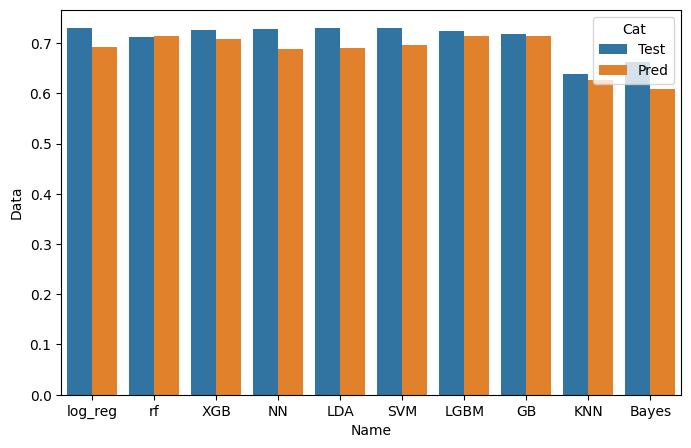

In [66]:
plt.figure(figsize=(8, 5))
data1 = {'Name': names2, 
         'Data': data, 
         'Cat': ['Test', 'Pred'] * 10}
df1 = pd.DataFrame(data1)

sns.barplot(data=df1, x='Name', y='Data', hue='Cat')

# **Logistic Regression**

              precision    recall  f1-score   support

   recovered       0.96      0.69      0.80      4647
   uncovered       0.15      0.66      0.24       381

    accuracy                           0.69      5028
   macro avg       0.55      0.67      0.52      5028
weighted avg       0.90      0.69      0.76      5028


Square under ROC-curve - 0.6734

Code working time - 0.2043 sec


The area under ROC-curve by probability - 0.7288889566660849


Result by the estimated sample - 0.6899511599511601


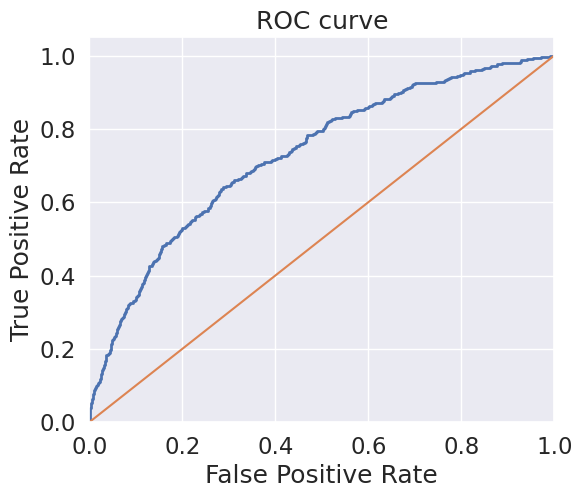

In [67]:
start_time = process_time()

clf = LogisticRegression( random_state=0, C=10, penalty='l1', solver='liblinear' )
clf.fit( X_train, y_train )
y_pred = clf.predict( X_test )

finish_time = process_time()
time = finish_time - start_time

results( y_test, y_pred, time )
print('\n')
print('The area under ROC-curve by probability - ' + str(metrics.roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])))

print('\n')
print('Result by the estimated sample - ' + str(metrics.roc_auc_score(y_to_pred, clf.predict_proba(X_to_pred)[:,1])))

ROC_curve(y_test, clf)

In [68]:
from sklearn.model_selection import GridSearchCV

start_time = process_time()

parameters = {
    'C' : [0.001,0.01, 0.1, 1, 10, 100, 1000],
    'penalty' : ['l1', 'l2', 'elasticnet', 'none']
    }

gr_lr = GridSearchCV(LogisticRegression(solver='saga', n_jobs=-1, random_state=17), parameters, cv=5, scoring='roc_auc')
gr_lr.fit( X_train, y_train )

finish_time = process_time()
time = finish_time - start_time

print(round(time, 2))
gr_lr.best_params_

116.11


{'C': 1, 'penalty': 'l2'}

# **Random Forest**

              precision    recall  f1-score   support

   recovered       0.95      0.81      0.88      4647
   uncovered       0.17      0.46      0.25       381

    accuracy                           0.79      5028
   macro avg       0.56      0.64      0.56      5028
weighted avg       0.89      0.79      0.83      5028


Square under ROC-curve - 0.6354

Code working time - 3.7243 sec


The area under ROC-curve by probability - 0.7115569156179558


Result by the estimated sample - 0.7114896214896216


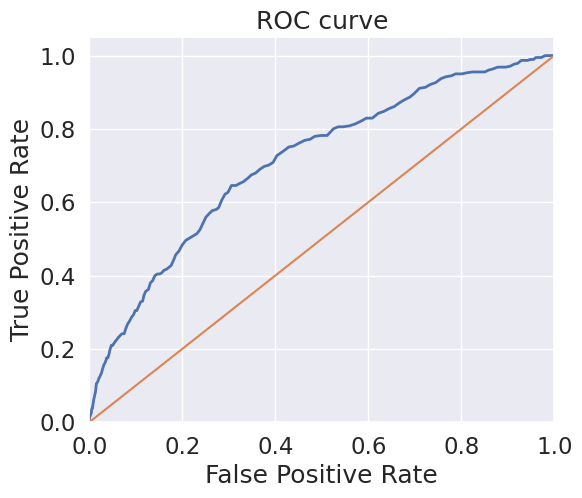

In [69]:
start_time = process_time()

rf = RandomForestClassifier( n_estimators=200, max_depth=None, random_state=11, criterion='entropy' )
rf.fit( X_train, y_train )
y_pred = rf.predict( X_test )

finish_time = process_time()
time = finish_time - start_time

results( y_test, y_pred, time )
print('\n')
print('The area under ROC-curve by probability - ' + str(metrics.roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])))

print('\n')
print('Result by the estimated sample - ' + str(metrics.roc_auc_score(y_to_pred, rf.predict_proba(X_to_pred)[:,1])))

ROC_curve(y_test, rf)

In [70]:
start_time = process_time()

parameters = {
    'n_estimators' : [100, 150, 200, 250],
    'max_depth' : [7, 10, 13, None]
    }

gr_rf = GridSearchCV(RandomForestClassifier(), parameters, cv=5, n_jobs=-1, scoring=roc_auc_scorer)
gr_rf.fit( X_train, y_train )

finish_time = process_time()
time = finish_time - start_time

print(round(time, 2))
gr_rf.best_params_

131.07


{'max_depth': None, 'n_estimators': 250}

# **XGBoost**

              precision    recall  f1-score   support

   recovered       0.96      0.70      0.81      4647
   uncovered       0.15      0.63      0.24       381

    accuracy                           0.70      5028
   macro avg       0.55      0.67      0.53      5028
weighted avg       0.90      0.70      0.77      5028


Square under ROC-curve - 0.668

Code working time - 4.4092 sec


The area under ROC-curve by probability - 0.7258934870068291


Result by the estimated sample - 0.7091208791208791


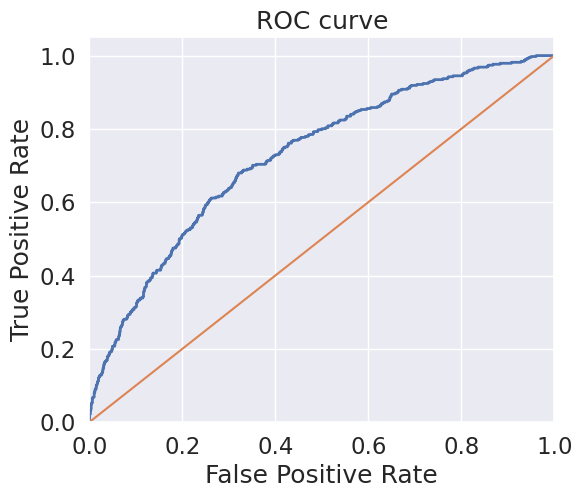

In [74]:
start_time = process_time()

XGB = XGBClassifier( refresh_leaf=0, verbosity=0, max_depth=3, n_estimators=150, reg_alpha=0, reg_lambda=10 )
xgb_model = XGB.fit( X_train, y_train, verbose=0, eval_metric='auc', eval_set=[(X_test, y_test)], early_stopping_rounds=20 )
y_pred = xgb_model.predict( X_test )

finish_time = process_time()
time = finish_time - start_time

results( y_test, y_pred, time )
print('\n')
print('The area under ROC-curve by probability - ' + str(metrics.roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:,1])))

print('\n')
print('Result by the estimated sample - ' + str(metrics.roc_auc_score(y_to_pred, xgb_model.predict_proba(X_to_pred)[:,1])))

ROC_curve(y_test, xgb_model)

# **Neural network**

              precision    recall  f1-score   support

   recovered       0.96      0.73      0.83      4647
   uncovered       0.15      0.60      0.25       381

    accuracy                           0.72      5028
   macro avg       0.56      0.66      0.54      5028
weighted avg       0.90      0.72      0.79      5028


Square under ROC-curve - 0.6639

Code working time - 33.7702 sec


The area under ROC-curve by probability - 0.7280620748745981


Result by the estimated sample - 0.6895848595848595


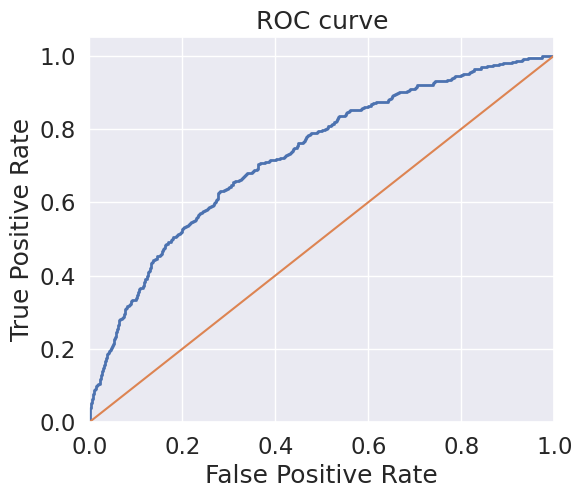

In [75]:
start_time = process_time()

nn = MLPClassifier( activation='logistic', solver='adam', hidden_layer_sizes=(100, 100) )
nn.fit( X_train, y_train )
y_pred = nn.predict( X_test )

finish_time = process_time()
time = finish_time - start_time

results( y_test, y_pred, time )
print('\n')
print('The area under ROC-curve by probability - ' + str(metrics.roc_auc_score(y_test, nn.predict_proba(X_test)[:,1])))

print('\n')
print('Result by the estimated sample - ' + str(metrics.roc_auc_score(y_to_pred, nn.predict_proba(X_to_pred)[:,1])))

ROC_curve(y_test, nn)

# **LDA**

              precision    recall  f1-score   support

   recovered       0.96      0.70      0.81      4647
   uncovered       0.15      0.65      0.24       381

    accuracy                           0.69      5028
   macro avg       0.56      0.67      0.53      5028
weighted avg       0.90      0.69      0.77      5028


Square under ROC-curve - 0.6743

Code working time - 0.1925 sec


The area under ROC-curve by probability - 0.7302936390536722


Result by the estimated sample - 0.6898046398046398


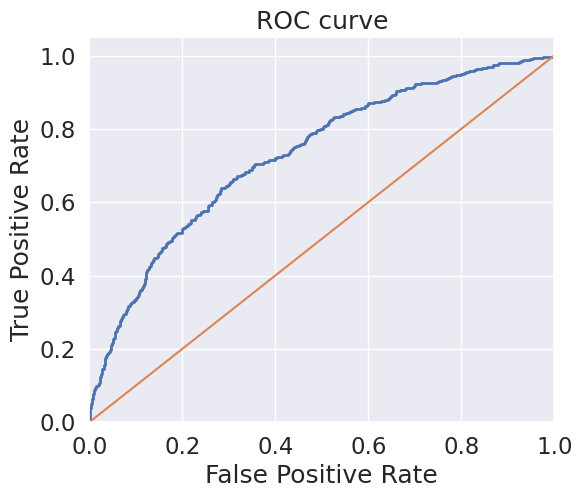

In [76]:
start_time = process_time()

lda = LDA()
lda.fit( X_train, y_train )
y_pred = lda.predict( X_test )

finish_time = process_time()
time = finish_time - start_time

results( y_test, y_pred, time )
print('\n')
print('The area under ROC-curve by probability - ' + str(metrics.roc_auc_score(y_test, lda.predict_proba(X_test)[:,1])))

print('\n')
print('Result by the estimated sample - ' + str(metrics.roc_auc_score(y_to_pred, lda.predict_proba(X_to_pred)[:,1])))

ROC_curve(y_test, lda)

# **SVM**

              precision    recall  f1-score   support

   recovered       0.96      0.71      0.82      4647
   uncovered       0.15      0.64      0.25       381

    accuracy                           0.71      5028
   macro avg       0.56      0.68      0.53      5028
weighted avg       0.90      0.71      0.78      5028


Square under ROC-curve - 0.6768

Code working time - 22.0091 sec


The area under ROC-curve by probability - 0.7303258332217835


Result by the estimated sample - 0.6963369963369964


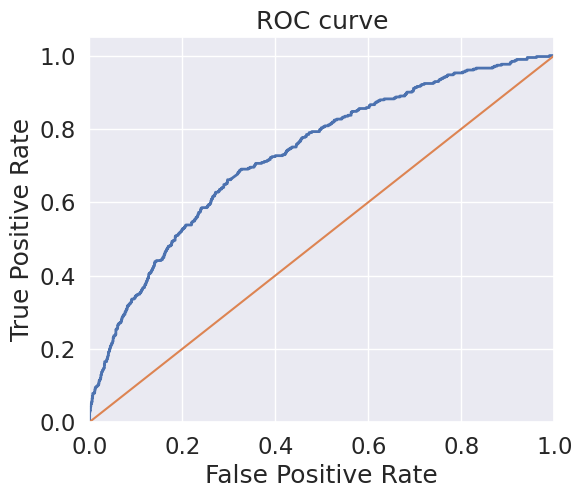

In [77]:
start_time = process_time()

svm = SVC(gamma='auto', probability=True)
svm.fit( X_train, y_train )
y_pred = svm.predict( X_test )

finish_time = process_time()
time = finish_time - start_time

results( y_test, y_pred, time )
print('\n')
print('The area under ROC-curve by probability - ' + str(metrics.roc_auc_score(y_test, svm.predict_proba(X_test)[:,1])))

print('\n')
print('Result by the estimated sample - ' + str(metrics.roc_auc_score(y_to_pred, svm.predict_proba(X_to_pred)[:,1])))

ROC_curve(y_test, svm)

In [78]:
start_time = process_time()

parameters = {
    'C' : [0.01, 0.1, 1, 10, 100],
    'gamma' : [0.1, 1, 10, 'auto'],
    }

gr_svm = GridSearchCV(SVC(probability=True), parameters, cv=3, n_jobs=-1, scoring=roc_auc_scorer)
gr_svm.fit( X_train, y_train )

finish_time = process_time()
time = finish_time - start_time

print(round(time, 2))
gr_svm.best_params_

665.4


{'C': 100, 'gamma': 10}

# **GBoost**

              precision    recall  f1-score   support

   recovered       0.95      0.85      0.89      4647
   uncovered       0.18      0.42      0.26       381

    accuracy                           0.81      5028
   macro avg       0.57      0.63      0.57      5028
weighted avg       0.89      0.81      0.85      5028


Square under ROC-curve - 0.6344

Code working time - 25.2164 sec


The area under ROC-curve by probability - 0.7022790646972873


Result by the estimated sample - 0.6918803418803419


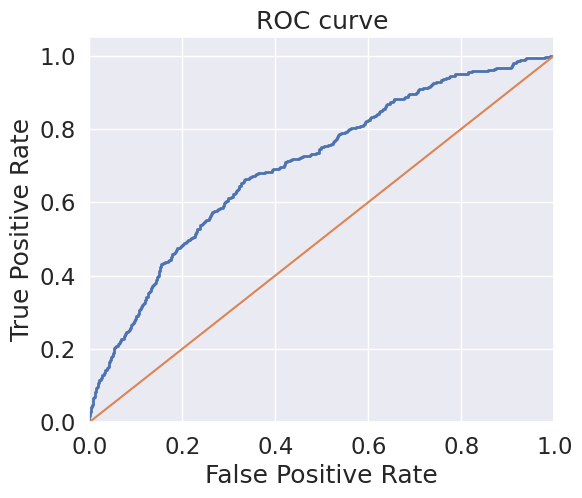

In [79]:
start_time = process_time()

GB = GBoost( loss='exponential', max_depth=13, n_estimators=250 )
GB.fit( X_train, y_train )
y_pred = GB.predict( X_test )

finish_time = process_time()
time = finish_time - start_time

results( y_test, y_pred, time )
print('\n')
print('The area under ROC-curve by probability - ' + str(metrics.roc_auc_score(y_test, GB.predict_proba(X_test)[:,1])))

print('\n')
print('Result by the estimated sample - ' + str(metrics.roc_auc_score(y_to_pred, GB.predict_proba(X_to_pred)[:,1])))

ROC_curve(y_test, GB)

In [80]:
start_time = process_time()

parameters = {
    'n_estimators' : [100, 150, 200, 250],
    'max_depth' : [7, 10, 13, None],
    }

gr_gb = GridSearchCV(GBoost(loss='exponential'), parameters, cv=5, n_jobs=-1, scoring=roc_auc_scorer)
gr_gb.fit( X_train, y_train )

finish_time = process_time()
time = finish_time - start_time

print(round(time, 2))
gr_gb.best_params_

985.86


{'max_depth': 13, 'n_estimators': 250}